# Connect với drive có data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import thư viện

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras.utils as ku
import numpy as np
import matplotlib.pyplot as plt


# Đọc data và xử lý

In [ ]:
data = open('/content/drive/MyDrive/RNN/data_30_tu.txt').read()

In [ ]:
corpus = data.lower().split('\n')

In [ ]:
corpus

['bộ trưởng phùng xuân nhạ kiểm tra công tác chấm thi tại hà giang',
 'quyết lấy lại niềm tin',
 'ngày 286 sở đã tiến hành bàn giao toàn bộ bài thi tự luận cho ban làm phách để tiến hành làm phách theo quy định.',
 'công tác chấm thi diễn ra từ ngày 306 và phấn đấu kết thúc vào ngày 67.',
 'đến thời điểm này đã quét xong toàn bộ bài thi trắc nghiệm.',
 'hà giang có những chỉ đạo rất khác biệt so với một số tỉnh.',
 'chẳng như phó bí thư tỉnh ủy chủ tịch ubdnd tỉnh làm trưởng ban chỉ đạo thi.',
 'hình thành thêm ban chỉ đạo cấp huyện thành phố.',
 'giao cho phó chủ tịch ubnd phụ trách khối văn xã làm trưởng ban chỉ đạo cấp huyện thành phố',
 'đặc biệt ở các ban chỉ đạo này có thêm thành phần là chủ tịch ubnd các xã  thị trấn trên địa bàn.',
 'qua đó giúp triển khai nhiệm vụ thi từ tỉnh đến cơ sở bảo đảm kỳ thi diễn ra nghiêm túc an toàn.',
 'hà giang quyết tâm lấy lại hình ảnh niềm tin của nhân dân cán bộ giáo viên và xã hội đối với kỳ thi.',
 'bộ trưởng yêu cầu việc giám sát các khâu c

In [ ]:
# tổng số câu
print(len(corpus))


16921


In [ ]:
# tokenizer lấy xác suất xuất hiện, xếp theo thứ tự giảm dần
tokenizer = Tokenizer()

# chuyển câu thành ma trận
tokenizer.fit_on_texts(corpus)

# tổng số từ: 6630
total_words = len(tokenizer.word_index) + 1
print(total_words)  

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  # Chuyển câu thành vector
  # print(token_list) 

  # tạo tập data theo thứ tự bậc thang
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    # print(n_gram_sequence)
    input_sequences.append(n_gram_sequence)

6630


In [ ]:
# số lượng dataset 291797
print(len(input_sequences))

291797


# Chia features, label

In [ ]:
#  pad sequences
max_sequences_len = max([len(x) for x in input_sequences])

# câu có nhiều số từ nhất : 33
print(max_sequences_len)

# thêm padding
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequences_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:, :-1],  input_sequences[:, -1]


33


In [ ]:
# Đổi label từ số thành ma trận tương ứng
label = ku.to_categorical(label, num_classes=total_words)

# Model

In [ ]:
# Sử dụng cả lớp LSTM và Bidirectional để tăng lượng param
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequences_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation= 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# print(model.summary())

In [ ]:
# tạo checkpoint
my_checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/RNN/vtc_giao_duc_data.h5", verbose=1, save_weights_only=True)

# Train Model

In [ ]:
history = model.fit(predictors, label, epochs=100, batch_size=64, callbacks=my_checkpointer)

Epoch 1/100
4560/4560 [==============================] - 115s 25ms/step - loss: 3.3607 - accuracy: 0.3582

Epoch 00001: saving model to /content/drive/MyDrive/RNN/vtc_giao_duc_data.h5
Epoch 2/100
4560/4560 [==============================] - 116s 25ms/step - loss: 3.3582 - accuracy: 0.3591

Epoch 00002: saving model to /content/drive/MyDrive/RNN/vtc_giao_duc_data.h5
Epoch 3/100
4560/4560 [==============================] - 117s 26ms/step - loss: 3.3560 - accuracy: 0.3586

Epoch 00003: saving model to /content/drive/MyDrive/RNN/vtc_giao_duc_data.h5
Epoch 4/100
4560/4560 [==============================] - 118s 26ms/step - loss: 3.3553 - accuracy: 0.3600

Epoch 00004: saving model to /content/drive/MyDrive/RNN/vtc_giao_duc_data.h5
Epoch 5/100
4560/4560 [==============================] - 117s 26ms/step - loss: 3.3557 - accuracy: 0.3606

Epoch 00005: saving model to /content/drive/MyDrive/RNN/vtc_giao_duc_data.h5
Epoch 6/100
4560/4560 [==============================] - 117s 26ms/step - loss: 

# Vẽ biểu đố accuracy và loss

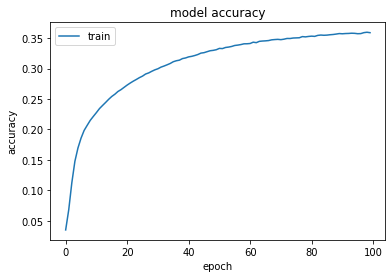

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('accuracy_RNN_Lan_1.png')
plt.show()

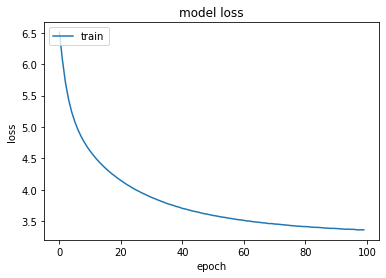

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('loss_RNN_Lan_1.png')
plt.show()

# Test model

In [ ]:
test_seq = 'Học sinh'
next_word = 2

for _ in range(next_word):
  token_list = tokenizer.texts_to_sequences(test_seq)[0]
  token_list = pad_sequences([token_list], maxlen= max_sequences_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  # print(predicted)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  test_seq += " " + output_word
  print(test_seq)
print(test_seq)